In [ ]:
# load extensions
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False
%cd ../

In [2]:
import warnings
warnings.filterwarnings('ignore')

from src.python.preprocessors import ImageClassificationPreprocessor
import yaml
import cv2
import matplotlib.pyplot as plt
from onnxruntime import InferenceSession
import numpy as np

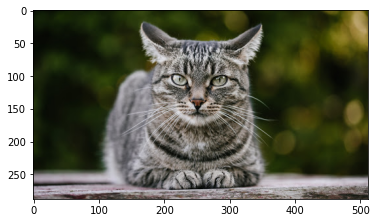

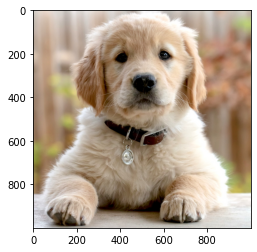

In [3]:
cat_image = cv2.imread('demonstration/cat.jpeg')
cat_image = cv2.cvtColor(cat_image, cv2.COLOR_BGR2RGB)
plt.imshow(cat_image)
plt.show()

dog_image = cv2.imread('demonstration/dog.jpeg')
dog_image = cv2.cvtColor(dog_image, cv2.COLOR_BGR2RGB)
plt.imshow(dog_image)
plt.show()

In [4]:
# load config after training
config = yaml.full_load(open('projects/project_1/experiment_1_20210425T160638/cfg_20210425T160638.yaml'))
# load preprocessor from config
preprocessor = ImageClassificationPreprocessor(config, mode='inference')

In [5]:
# preprocess images
cat_image_prep = preprocessor.process(cat_image)
dog_image_prep = preprocessor.process(dog_image)

In [6]:
# load model after training
session = InferenceSession('demonstration/demonstration_20210425T160638.onnx')

In [7]:
cat_input = {session.get_inputs()[0].name: np.array(cat_image_prep)}
dog_input = {session.get_inputs()[0].name: np.array(dog_image_prep)}

In [8]:
# run model on preprocessed images
cat_output = session.run(None, cat_input)[0]
dog_output = session.run(None, dog_input)[0]

In [9]:
print(f'Cat output is {cat_output}, so the label is {np.argmax(cat_output)}')
print(f'Dog output is {dog_output}, so the label is {np.argmax(dog_output)}')

Cat output is [[-0.00335416 -0.5850492 ]], so the label is 0
Dog output is [[-0.97726387  0.1000289 ]], so the label is 1
